<a href="https://colab.research.google.com/github/cyamize/NLP/blob/main/NLP_20210701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

In [2]:
from konlpy.tag import Okt
import re # 정규표현식 

okt = Okt()
token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")
token

'정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다'

In [3]:
okt.morphs(token)

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']

In [4]:
token = okt.morphs(token)  # 형태소 토큰화한 text를 객체로 생성 

word2index = {}  # 빈 딕셔너리를 생성
bow = [ ] # 단어 주머니 생성

for voca in token:  # 토큰화된 단어를 하나씩 불러서 반복 
  if voca not in word2index.keys(): # 만약 단어사전(딕셔너리)에 단어가 없다면,  
    word2index[voca] = len(word2index) # 단어사전(딕셔너리) 전체 크기를 단어사전으로 설정하고 
    bow.insert(len(word2index)-1,1)  
    # token화된 단어를 읽으면서, 단어사전(딕셔너리)에 없는 단어는 추가하고 있는 단어는 남김
    # 단어집합(bow) 전체에 전부 1 만들어줌(단어의 개수는 최소 1개 이상이기 때문)

  else: 
    index=word2index.get(voca)
    bow[index] = bow[index]+1  
    # 재등장하는 단어의 인덱스를 받아와서 재등장한 단어는 해당 인덱스 위치에 1을 더해줌 

print(word2index)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [5]:
print(bow)  # 단어 갯수 세기 

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [6]:
# countervectorizer 이용 

from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 단어의 빈도수 
print(vector.vocabulary_)  # 각 단어의 인덱스

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [7]:
# TF-IDF matrix 

import pandas as pd
from math import log 

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 



In [8]:
list(set(w for doc in docs for w in doc.split()))

['사과', '노란', '과일이', '바나나', '길고', '좋아요', '먹고', '싶은', '저는']

In [9]:
voca = list(set(w for doc in docs for w in doc.split()))
print(sorted(voca))

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [10]:
# 총 문서 수 

len(docs)

4

In [11]:
N = len(docs)

def tf(t, d):  # term frequecy : 단어의 빈도 
  return d.count(t)   

def idf(t): #inversed document frequency : 역문서 빈도 
  df = 0 
  for doc in docs: 
    df += t in doc 
  return log(N/(df+1))

def tfidf(t, d): 
  return tf(t,d) * idf(t)


In [12]:
# term frequency 

result = [ ]

for i in range(N): # 각 문서마다 실행 
  result.append([])  
  d =  docs[i]
  for j in range(len(voca)): 
    t = voca[j]
    result[-1].append(tf(t,d)) 
  
tf_=pd.DataFrame(result, columns= voca)
tf_

,사과,노란,과일이,바나나,길고,좋아요,먹고,싶은,저는
0,1,0,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,1,0
2,0,1,0,2,1,0,0,0,0
3,0,0,1,0,0,1,0,0,1


In [13]:
# idf 

result = [ ]

for j in range(len(voca)): 
  t=voca[j]
  result.append(idf(t))

idf_=pd.DataFrame(result, index=voca, columns=["IDF"])
idf_ 

,IDF
사과,0.693147
노란,0.693147
과일이,0.693147
바나나,0.287682
길고,0.693147
좋아요,0.693147
먹고,0.287682
싶은,0.287682
저는,0.693147


In [14]:
# tf-idf 

result = [ ]

for i in range(N): 
  result.append([])
  d= docs[i]
  for j in range(len(voca)):
    t= voca[j]

    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns=voca)
tfidf_

,사과,노란,과일이,바나나,길고,좋아요,먹고,싶은,저는
0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.287682,0.287682,0.000000
2,0.000000,0.693147,0.000000,0.575364,0.693147,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147


In [15]:
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [17]:
token = Tokenizer()
token.fit_on_texts(texts) # 정수인덱스 부여(1부터 시작)
print(token.word_index)


{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [18]:
print(token.texts_to_matrix(texts, mode = 'count')) 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [19]:
print(token.texts_to_matrix(texts, mode = 'binary')) # 있으면 1, 없으면 0 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [20]:
# keras 

In [21]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

딥러닝 실행 순서 

1. 데이터 수집 - 전처리 
2. 모델링 
3. 컴파일: 환경 설정 (train data) 
4. 학습(fit, fit_transform)

In [22]:
import tensorflow as tf
tf.keras.layers.Dense(10)

In [23]:
from tensorflow.keras.layers import Dense
Dense(10)

In [24]:
import numpy as np 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

In [25]:
# 데이터 전처리
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

In [26]:
# 모델링 
model = Sequential()

In [27]:
model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(optimizer='sgd', loss='mse')

In [28]:
model.fit(xs, ys, epochs=1200, verbose=0)

In [29]:
model.predict([10.0])

array([[16.000046]], dtype=float32)

In [30]:
# 선형 회귀 구현 

from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트


In [31]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [32]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd =optimizers.SGD(lr=0.01)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'] )

model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 392.6750 - accuracy: 0.0000e+00
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3225 - accuracy: 0.0000e+00
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3159 - accuracy: 0.0000e+00
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3096 - accuracy: 0.0000e+00
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 2.3036 - accuracy: 0.0000e+00
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2978 - accuracy: 0.0000e+00
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2922 - accuracy: 0.0000e+00
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2868 - accuracy: 0.0000e+00
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2817 - accuracy: 0.0000e+00
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 2.2768 - accuracy

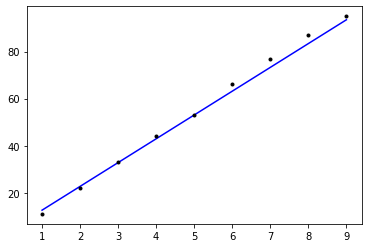

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X, y,'k.')

In [35]:
# 선형 회귀 ( tf v2. tape 활용 )

# 자동 미분 

import tensorflow as tf 

w = tf.Variable(2.) 

def f(w): 
  y = w**2 
  z = 2*y + 5
  return z 

In [36]:
with tf.GradientTape() as tape: 
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [37]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [38]:
W = tf.Variable(4.0)
b = tf.Variable(1.0 )

In [39]:
@tf.function 

def hypothesis(x): 
  return W*x+b 

In [40]:
x_test = [3.5, 5, 5.5, 6]

print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [41]:
@tf.function 

def mse_loss(y_pred, y ):
  return tf.reduce_mean(tf.square(y_pred - y))

In [42]:
optimizer = tf.optimizers.SGD(0.01)

for i in range(301): 
  with tf.GradientTape() as tape: 
    y_pred = hypothesis(X)
    cost = mse_loss(y_pred, y)

  gradients = tape.gradient(cost, [W,b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0: 
    print("epoch: {:3}, W의 값:{:5.4f}, b의 값: {:5.4f}, cost :{:5.4f}".format(i, W.numpy(), b.numpy(), cost))

epoch:   0, W의 값:8.2133, b의 값: 1.6644, cost :1402.5555
epoch:  10, W의 값:10.4971, b의 값: 1.9769, cost :1.3512
epoch:  20, W의 값:10.5047, b의 값: 1.9297, cost :1.3282
epoch:  30, W의 값:10.5119, b의 값: 1.8844, cost :1.3070
epoch:  40, W의 값:10.5188, b의 값: 1.8409, cost :1.2874
epoch:  50, W의 값:10.5254, b의 값: 1.7991, cost :1.2695
epoch:  60, W의 값:10.5318, b의 값: 1.7591, cost :1.2529
epoch:  70, W의 값:10.5379, b의 값: 1.7206, cost :1.2376
epoch:  80, W의 값:10.5438, b의 값: 1.6837, cost :1.2236
epoch:  90, W의 값:10.5494, b의 값: 1.6483, cost :1.2107
epoch: 100, W의 값:10.5548, b의 값: 1.6143, cost :1.1987
epoch: 110, W의 값:10.5600, b의 값: 1.5817, cost :1.1878
epoch: 120, W의 값:10.5650, b의 값: 1.5504, cost :1.1777
epoch: 130, W의 값:10.5697, b의 값: 1.5204, cost :1.1684
epoch: 140, W의 값:10.5743, b의 값: 1.4916, cost :1.1598
epoch: 150, W의 값:10.5787, b의 값: 1.4639, cost :1.1519
epoch: 160, W의 값:10.5829, b의 값: 1.4373, cost :1.1446
epoch: 170, W의 값:10.5870, b의 값: 1.4119, cost :1.1379
epoch: 180, W의 값:10.5909, b의 값: 1.3874, cost

In [43]:
x_test = [3.5, 5, 5.5, 6, 9.5]

print(hypothesis(x_test).numpy())

[ 38.35479   54.295143  59.608593  64.92204  102.1162  ]


In [44]:
# 로지스틱 회귀 

%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 

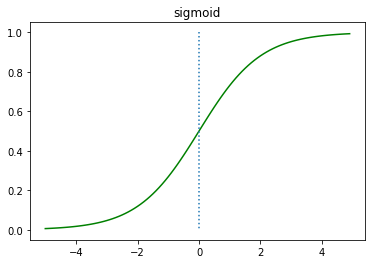

In [45]:
def sigmoid(x): 
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('sigmoid')
plt.show()


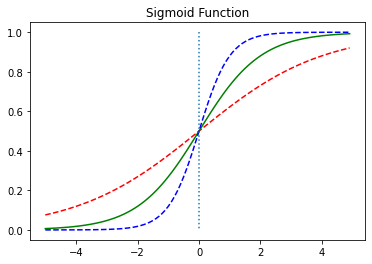

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

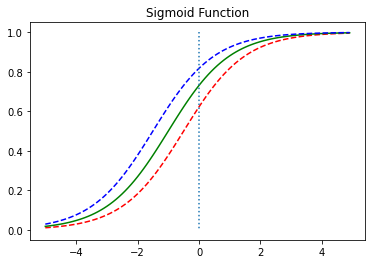

In [47]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [48]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers 

In [49]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [50]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [51]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
13/13 [==============================] - 0s 2ms/step - loss: 8.7175 - binary_accuracy: 0.6154 
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 0.2083 - binary_accuracy: 0.9231
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 0.2013 - binary_accuracy: 0.9231
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1983 - binary_accuracy: 0.9231
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1962 - binary_accuracy: 0.9231
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1944 - binary_accuracy: 0.9231
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1928 - binary_accuracy: 0.9231
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1913 - binary_accuracy: 0.9231
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1897 - binary_accuracy: 0.9231
Epoch 10/300
13/13 [=========================

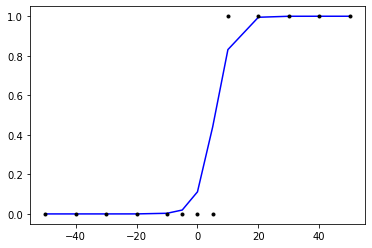

In [52]:
%matplotlib inline 

import matplotlib.pyplot as plt

plt.plot(X, model.predict(X), 'b', X, y, 'k.')

In [53]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))


[[0.15366344]
 [0.20760556]
 [0.27434537]
 [0.35298282]
 [0.39589792]]
[[0.8766603 ]
 [0.99641895]
 [0.9999082 ]
 [0.9999976 ]
 [1.        ]]


In [54]:
# 다중 선형 회귀 

import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [55]:
# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 보고서
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([73,82,72,57,34]) # 최종 성적

In [56]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear' ))
sgd = optimizers.SGD(lr = 0.001)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [57]:
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X,y, batch_size=1, epochs=1000, shuffle=False)

Epoch 1/1000
5/5 [==============================] - 0s 3ms/step - loss: 7568518283264.0000 - mse: 7568518283264.0000
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 1754149749017798978306048.0000 - mse: 1754149749017798978306048.0000
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 406559553626434991154283561781035008.0000 - mse: 406559553626434991154283561781035008.0000
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: inf - mse: inf                                                                              
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: inf - mse: inf
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: inf - mse: inf
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - 

In [58]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [59]:
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([0, 1, 1, 1])

In [60]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss= 'binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X,y, batch_size=1, epochs=1000, shuffle=False)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3726 - binary_accuracy: 1.0000
Epoch 2/1000
4/4 [==============================] - 0s 122ms/step - loss: 0.3717 - binary_accuracy: 0.7500
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3708 - binary_accuracy: 0.7500
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3699 - binary_accuracy: 0.7500
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3690 - binary_accuracy: 0.7500
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3681 - binary_accuracy: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3673 - binary_accuracy: 0.7500
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3664 - binary_accuracy: 0.7500
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3656 - binary_accuracy: 0.7500
Epoch 10/1000
4/4 [==============================] - 

In [61]:
# softmax 활용, 회귀식 구현 

In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [64]:
df = load_iris()


In [65]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
# 2차원 >> 1차원 (ndarray)

x_data = np.array(df.data, dtype = np.float32)  
y_data =np.array(df.target, dtype = np.int32)

# shape(행,열) : shape(150,4)   
# x_data : shape(150,4)

x_data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [67]:
x_data.shape[1]  # 4

4

In [68]:
len(set(y_data))

3

In [69]:
nb_features = x_data.shape[1]
nb_classes = len(set(y_data))

In [70]:
print(x_data.shape)
print(y_data.shape)

(150, 4)
(150,)


In [71]:
# one-hot encoding 

tf.one_hot(indices=list(y_data), depth=nb_classes)

<tf.Tensor: shape=(150, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
     

In [72]:
y_one_hot = tf.one_hot(indices=list(y_data), depth=nb_classes)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [78]:
model=Sequential()

model.add(Dense(3, input_dim=4, activation='softmax'))

sgd = optimizers.SGD(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

history = model.fit(x_data, y_one_hot, batch_size = 1, epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
150/150 [==============================] - 2s 2ms/step - loss: 2.8547 - accuracy: 0.6200
Epoch 2/200
150/150 [==============================] - 0s 2ms/step - loss: 2.0568 - accuracy: 0.6667
Epoch 3/200
150/150 [==============================] - 0s 2ms/step - loss: 1.3300 - accuracy: 0.6667
Epoch 4/200
150/150 [==============================] - 1s 5ms/step - loss: 0.8708 - accuracy: 0.6667
Epoch 5/200
150/150 [==============================] - 0s 2ms/step - loss: 0.7492 - accuracy: 0.5333
Epoch 6/200
150/150 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.4800
Epoch 7/200
150/150 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 8/200
150/150 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5133
Epoch 9/200
150/150 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5400
Epoch 10/200
150/150 [==============================] - 0s 2ms/step - loss: 0.6399 - accura

In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [76]:
df = load_iris()
df.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [80]:
# weights
tf.random.set_seed(2021)
W = tf.Variable(tf.random.normal([nb_features, nb_classes], mean=0.0))
b = tf.Variable(tf.random.normal([nb_classes], mean=0.0))

# one-hot encoding

y_one_hot = tf.one_hot(indices=list(y_data), depth=nb_classes)

print(W.numpy())
print()
print(b.numpy())

[[ 1.0473857  -0.12665796  0.5701126 ]
 [-1.2995517   0.6850755  -0.6931981 ]
 [-0.14386335  0.8652593   1.4287399 ]
 [-0.8128876  -0.05127564 -0.14279948]]

[-0.5503563  1.0144334 -0.9311876]


In [82]:
learning_rate = 0.01

# softmax
def softmax(X):
  sm = tf.nn.softmax(tf.matmul(x_data, W)+b) # matmul -> matrix로 내적
  return sm

# training
for i in range(10001): 
  with tf.GradientTape() as tape:

    sm = softmax(x_data)
    cost = tf.reduce_mean(-tf.reduce_sum(y_one_hot*tf.math.log(sm), axis=1))
    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(learning_rate*W_grad)
    b.assign_sub(learning_rate*b_grad)

  if i % 1000 == 0:
    print(i, W.numpy, b.numpy, cost.numpy())

0 <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[ 1.0637612 , -0.13294913,  0.5600282 ],
       [-1.2883209 ,  0.6787557 , -0.6981091 ],
       [-0.13909794,  0.8665873 ,  1.4226465 ],
       [-0.8120897 , -0.05049854, -0.14437447]], dtype=float32)>> <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-0.54708475,  1.0129389 , -0.9329647 ], dtype=float32)>> 1.8649082
1000 <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[ 1.6150554 , -0.08059238, -0.04362225],
       [-0.34522897,  0.04512062, -1.0075667 ],
       [-0.9438255 ,  1.1389954 ,  1.9549651 ],
       [-1.1924429 , -0.2333845 ,  0.41886395]], dtype=float32)>> <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-0.3529198,  1.0166141, -1.1308036], dtype=float32)>> 0.34604067
2000 <bound m

In [85]:
predicted = tf.argmax(softmax(x_data), axis=1)
real = tf.argmax(y_one_hot, axis=1)

def acc(predicted, real):
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, real), dtype=tf.float32))
  return accuracy

accuracy = acc(predicted, real).numpy()
print(accuracy)

0.9866667


In [86]:
# MLP

In [87]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers

In [88]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # 정규화(0-1)

11493376/11490434 [==============================] - 0s 0us/step


In [92]:
model=Sequential([Flatten(input_shape=(28,28)),
                   Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
                    ])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate

In [94]:
# MLP로 20개 뉴스 그룹 분류하기

import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [96]:
newsdata = fetch_20newsgroups(subset='train')

In [97]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [99]:
len(newsdata.data)

11314

In [100]:
print(newsdata.target_names)
print(len(newsdata.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


In [101]:
newsdata.target[0]

7

In [103]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [105]:
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data[:10]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16
6,From: bmdelane@quads.uchicago.edu (brian manni...,13
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [107]:
data.isnull()

,email,target
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
11309,False,False
11310,False,False
11311,False,False
11312,False,False


In [108]:
data.isnull().values.any() # null값의 유무확인

False

In [109]:
data['email'].nunique() # 샘플 수

11314

In [111]:
data['target'].nunique() # 주제 수

20

In [112]:
data['target'].value_counts()

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

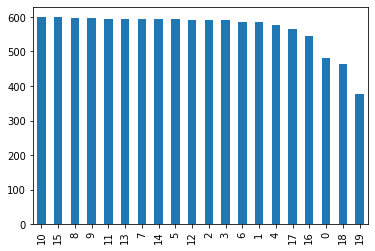

In [113]:
data['target'].value_counts().plot(kind='bar')

In [114]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [115]:
newsdata_test = fetch_20newsgroups(subset= 'test', shuffle=False)
train_email = data['email']
train_target = data['target']

In [116]:
test_email = newsdata_test.data
test_target = newsdata_test.target

In [117]:
max_words = 10000
num_classes = 20 # class 수

In [118]:
def prepare_data(train_data, test_data, mode): # 전처리 함수   
   t = Tokenizer(num_words=max_words)
   t.fit_on_texts(train_data)
   X_train = t.texts_to_matrix(train_data, mode=mode) # number of samples * max_words
   X_test = t.texts_to_metrix(test_data, mode=mode)
   return X_train, X_test, t.index_word

In [124]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [125]:
# binary mode로 변환

X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')

# one-hot encoding
y_train = to_categorical(train_target, num_classes)
y_test = to_categorical(test_target, num_classes)

In [126]:
print(X_train.shape) # 본문 크기
print(y_train.shape) # label 크기
print()
print(X_test.shape) 
print(y_test.shape)

(11314, 10000)
(11314, 20)

(7532, 10000)
(7532, 20)


In [134]:
print('빈도수가 많은 상위 1번 단어: {}'.format(index_to_word[1]))

빈도수가 많은 상위 1번 단어: the


In [135]:
print('빈도수가 많은 상위 9999번 단어: {}'.format(index_to_word[9999]))

빈도수가 많은 상위 9999번 단어: mic


In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [137]:
def fit_evaluate(X_train, y_train, X_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape(10000,), activation = 'relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(20, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.1)
  score = model.evluate(X_test, y_test, batch_size=128, verbose=1)
  return score[1]

In [139]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드 >> 리스트로 저장

for mode in modes:
  X_train, X_test, _ = prepare_data(train_email, test_email, mode)
  score = fit_evaluate(X_train, y_train, X_test, y_test)
  print(score)

NameError: ignored

In [140]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [141]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 9ms/step - loss: 2.2739 - accuracy: 0.3417 - val_loss: 0.9550 - val_accuracy: 0.8454
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 0.8687 - accuracy: 0.7587 - val_loss: 0.4584 - val_accuracy: 0.8878
Epoch 3/5
80/80 [==============================] - 1s 7ms/step - loss: 0.4364 - accuracy: 0.8867 - val_loss: 0.3509 - val_accuracy: 0.9072
Epoch 4/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2640 - accuracy: 0.9345 - val_loss: 0.3236 - val_accuracy: 0.9125
Epoch 5/5
80/80 [==============================] - 1s 7ms/step - loss: 0.1758 - accuracy: 0.9576 - val_loss: 0.3207 - val_accuracy: 0.9090
binary 모드의 테스트 정확도: 0.8270047903060913
Epoch 1/5
80/80 [==============================] - 1s 9ms/step - loss: 2.7824 - accuracy: 0.2466 - val_loss: 1.6732 - val_accuracy: 0.7385
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 1.4782 - accuracy: 0.6219 - val_loss: 0.7850 - val_accur

In [1]:
# 네이버 영화 리뷰 (MLP)

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 150kB/s 
     |████████████████████████████████| 450kB 16.7MB/s 
     |████████████████████████████████| 92kB 5.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
import pandas as pd
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x7fa3d2525a90>)

In [6]:
pd.read_table('ratings_train.txt')

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [7]:
train_data = pd.read_table('ratings_train.txt')

In [8]:
train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [10]:
def read_data(filename): 
  with open(filename, 'r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]  # 탭을 기준으로 split을 가져온다

    data = data[1:] # txt file의 head를 없앤이후의 데이터만 사용
  return data

train_data = read_data('ratings_train.txt')
test_data = read_data('rating_test.txt')

FileNotFoundError: ignored

In [11]:
len(train_data)

150000

In [12]:
len(train_data[0])

3

In [13]:
from konlpy.tag import Okt

okt = Okt()
okt.pos(u'이 밤 그날의 반딧불을 당신의 장 가까이 보낼게요')

[('이', 'Noun'),
 ('밤', 'Noun'),
 ('그날', 'Noun'),
 ('의', 'Josa'),
 ('반딧불', 'Noun'),
 ('을', 'Josa'),
 ('당신', 'Noun'),
 ('의', 'Josa'),
 ('장', 'Noun'),
 ('가까이', 'Noun'),
 ('보낼게요', 'Verb')]

In [15]:
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 장 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('장', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [16]:
import json # python dict()함수와 비슷하다
import os
from pprint import pprint

def tokenize(doc):
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [ ]:
if os.path.isfile('train_docs.json'):
  with open('train_docs.json') as f:
    train_docs = json.load(f)
  with open('test_docs.json') as f:
    test_docs = json.load(f)

else:
  train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
  test_docs = [(tokenize(row[1]), row[2]) for row in test_data]

  with open('tain_docs.json', 'w', encoding='utf-8') as make_file:
    json.dump(train_docs, make_file, ensure_ascii=False, indent='\t')
  with open('test_docs.json', 'w', encoding='utf-8') as make_file:
    json.dump(test_docs, make_file, ensure_ascii=False, indent='\t')

pprint(train_docs[0])

In [ ]:
tokens =[t for d in train_docs for t in d[0]]
len(tokens)

In [ ]:
import nltk

text =nltk.Text(tokens, name = 'NMSC')

print(len(test.tokens)) # 전체 토큰의 수

In [ ]:
print(len(set(text.tokens))) # 중복 제외한 토큰 개수

In [ ]:
pprint(text.vocab().most_columns(10))

In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(100)]

def term_frequency(doc):
  return [doc.count(word) for word in selected_words]

In [ ]:
train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in train_docs]

train_y = [c for _.c in train_docs]
test_y = [c for _.c in test_docs]

In [ ]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from tensorflow.keras.medels import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(100,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)
model.evaluate(x_test, y_test)
